In [3]:
from __future__ import division # to set floating point decimal
import nltk
from urllib.request import urlopen, Request # for webpages
from nltk import bigrams
import bs4
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import feedparser

In [53]:
llog = feedparser.parse("http://rss.cnn.com/rss/cnn_topstories.rss")
llog['feed']['title'] 
len(llog.entries)
#llog.entries


69

In [54]:
NewsFeed = feedparser.parse("https://www.nbcnewyork.com/news/top-stories/?rss=y&embedThumb=y&summary=y")

entry = NewsFeed.entries[0]

print (entry.published)
print ("******")
print (entry.summary)

len(NewsFeed.entries)

Sun, 26 May 2019 15:25:25 -0400
******
<br /><img src="https://media.nbcnewyork.com/images/213*120/East_Harlem_Shooting_May_26.jpg" align="left" hspace="5" /><br />Police are searching for a gunman who allegedly wounded his ex-girlfriend and killed another man in a Manhattan apartment early Sunday morning.


23

In [55]:
soupFeed = BeautifulSoup(entry.summary, "html.parser") # make the soup
for script in soupFeed(["script", "style"]):  # kill all script and style elements
    script.extract()    # rip it out
rawSummary = soupFeed.get_text() # get text
lines = (line.strip() for line in rawSummary.splitlines()) # break into lines and remove leading and trailing space on each
chunks = (phrase.strip() for line in lines for phrase in line.split("  ")) # break multi-headlines into a line each
rawSummary = '\n'.join(chunk for chunk in chunks if chunk) # drop blank lines
print(rawSummary)

Police are searching for a gunman who allegedly wounded his ex-girlfriend and killed another man in a Manhattan apartment early Sunday morning.


In [57]:
AllSumaries =''
for i in range(len(NewsFeed.entries)):
    entry = NewsFeed.entries[i]
    soupFeed = BeautifulSoup(entry.summary, "html.parser") # make the soup
    for script in soupFeed(["script", "style"]):  # kill all script and style elements
        script.extract()    # rip it out
    rawSummary = soupFeed.get_text() # get text
    lines = (line.strip() for line in rawSummary.splitlines()) # break into lines and remove leading and trailing space on each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  ")) # break multi-headlines into a line each
    rawSummary = '\n'.join(chunk for chunk in chunks if chunk) # drop blank lines
    AllSumaries += rawSummary
    
#print(AllSumaries)

In [58]:
tokensFeeds = nltk.word_tokenize(AllSumaries) # Create tokens (just looks for spaces in between "words")
print(type(tokensFeeds)) # now we have a list of words
print(len(tokensFeeds)) # we see we have 652 tokens
print (tokensFeeds[:10])

<class 'list'>
635
['Police', 'are', 'searching', 'for', 'a', 'gunman', 'who', 'allegedly', 'wounded', 'his']


In [59]:
textFeeds = nltk.Text(tokensFeeds)

# Let’s get rid of some stop words 
stopwords = nltk.corpus.stopwords.words('english')
customstopwords =["news","NBC","Saturday","Sunday","May","said","n't","seasons","users","I","It","TV", "review", "reviews", "critic", "season", "episode","All","full","Critic","Reviews","Season","Game","Thrones","read","Read",'New','new','the',"The","Show","show","Shows","shows","Series","series"]

punc = ['?','”',',','.','&','$','*',';','{','}','[',']','(',')','=','!','`','','>','+','<',':',"'s",'\’','...', '…','“','©','#','-',"\'",'!-!','—','!.!','»',"'"]
textFeeds = [w for w in textFeeds if w not in punc]
textFeeds = [w for w in textFeeds if w not in stopwords]
textFeeds = [w for w in textFeeds if w not in customstopwords]
textFeeds = [re.sub(r'\d+', '!', str(w)) for w in textFeeds if 1 == 1]
textFeeds = [re.sub(r'\|+', '', str(w)) for w in textFeeds if 1 == 1]
textFeeds = [w for w in textFeeds if w not in ['!']]

#print(textFeeds)

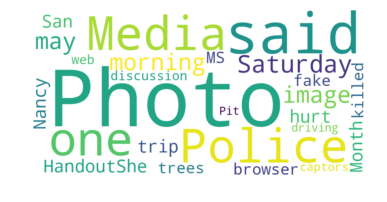

In [61]:
stopwords = set(STOPWORDS)
stopwords.update(["\'"],"news","NBC","Saturday","Sunday","May","Photo","said","Said")

x='\n'.join(map(str, list(set(textFeeds))))

# Generate a word cloud image for the Critics Reviews for the top 25 words
wordcloud = WordCloud(max_words=25,width=1000,height=500,background_color="white",stopwords = stopwords).generate(x)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Save the image in the img folder:
wordcloud.to_file("CNN_Top_Stories.png")